In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

In [7]:
df = pd.read_csv("Sales Dataset.csv")

In [8]:
# Convert 'Order Date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [9]:
# Create a 'Month' column by extracting the year and month
df['Month'] = df['Order Date'].dt.to_period('M').dt.to_timestamp()

In [10]:
# Aggregate total sales (Amount) by month
monthly_sales = df.groupby('Month')['Amount'].sum().reset_index()

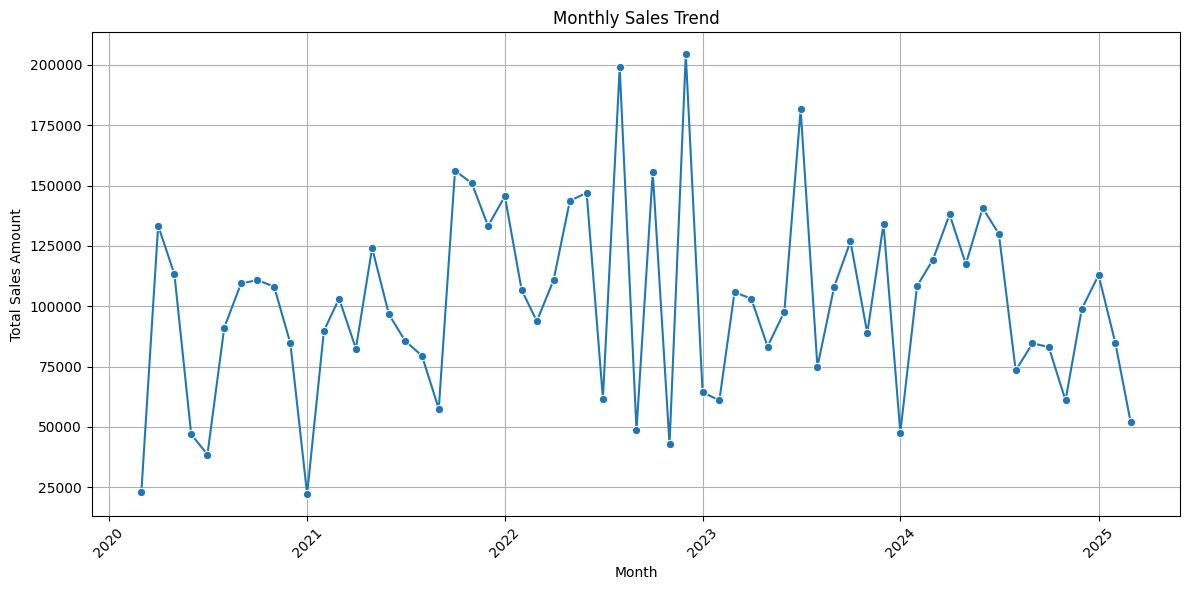

In [11]:
# Plot the historical monthly sales trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Amount', data=monthly_sales, marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
# Prepare data for Prophet (it requires 'ds' for date and 'y' for value)
sales_for_prophet = monthly_sales.rename(columns={'Month': 'ds', 'Amount': 'y'})

In [13]:
# Initialize the Prophet model
model = Prophet()

In [14]:
# Fit the model on the historical sales data
model.fit(sales_for_prophet)

13:12:35 - cmdstanpy - INFO - Chain [1] start processing
13:12:37 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
# Create a dataframe containing future dates for the next 6 months
future = model.make_future_dataframe(periods=6, freq='M')

C:\Users\aakas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [16]:
# Predict future sales using the trained model
forecast = model.predict(future)

In [19]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

           ds           yhat     yhat_lower     yhat_upper
62 2025-04-30   94021.198315   48881.108662  136951.375098
63 2025-05-31  121277.927471   79162.471366  161498.556223
64 2025-06-30  165009.287197  121836.079698  209361.091367
65 2025-07-31  120310.719303   77300.520467  163125.259909
66 2025-08-31   46550.930584    6580.686599   87369.116664


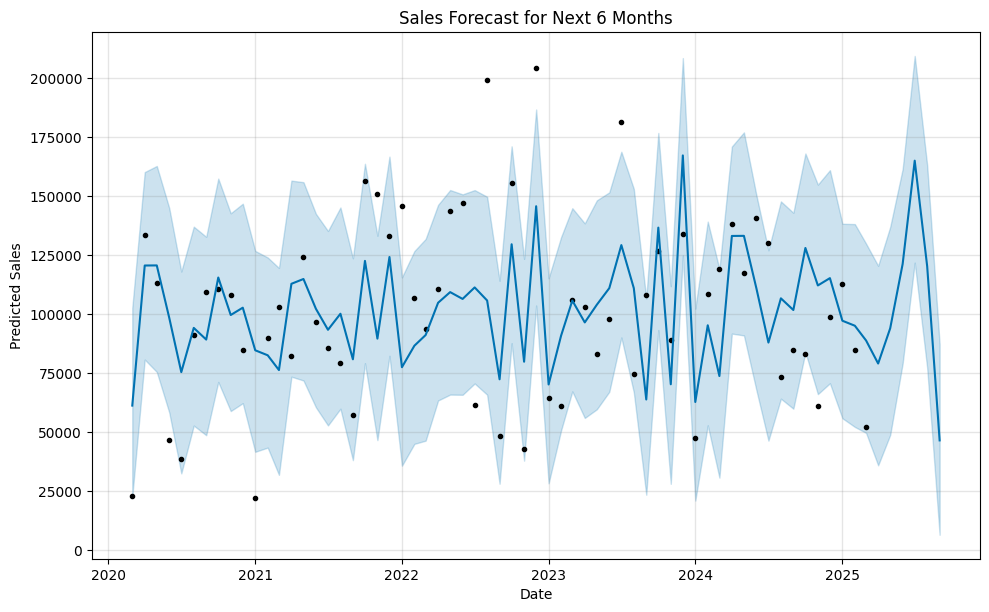

In [20]:
# Step 12: Plot the forecast along with historical data
fig = model.plot(forecast)
plt.title("Sales Forecast for Next 6 Months")
plt.xlabel("Date")
plt.ylabel("Predicted Sales")
plt.grid(True)
plt.show()


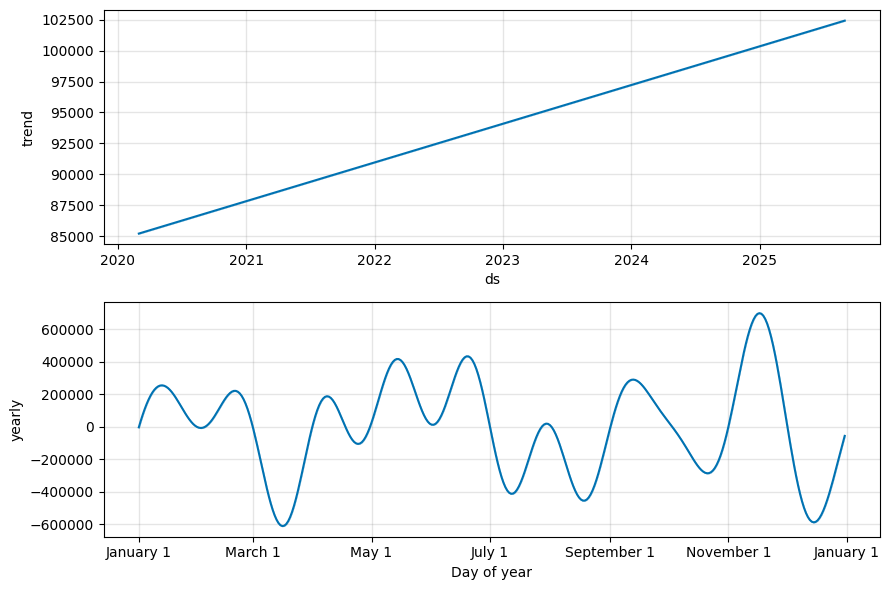

In [21]:
model.plot_components(forecast)
plt.tight_layout()
plt.show()

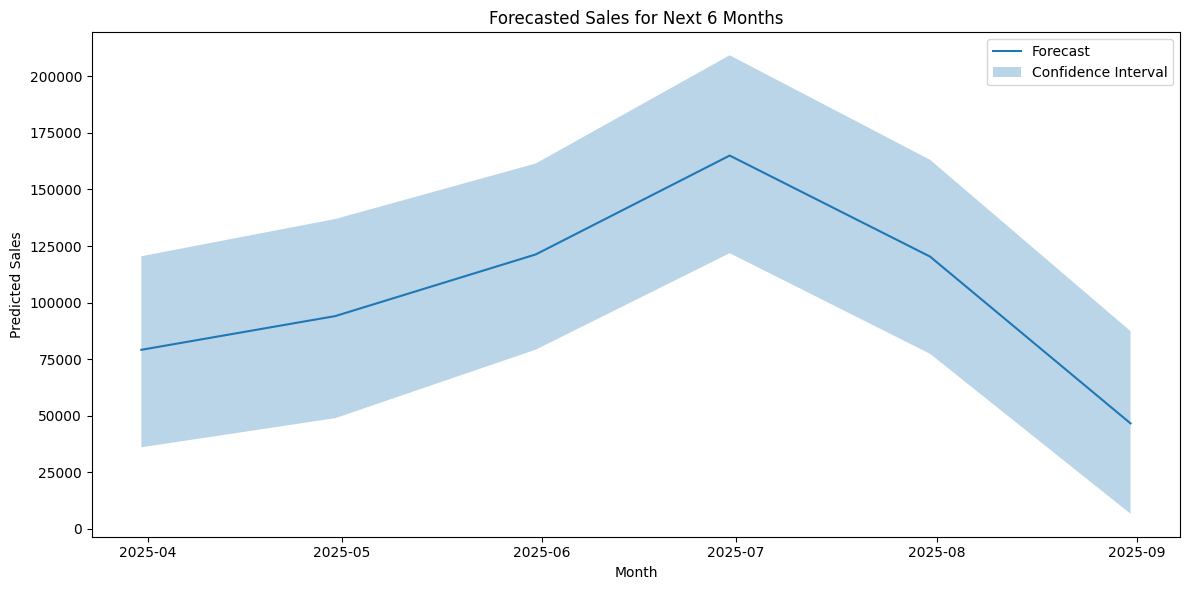

In [23]:
# Forecasted values for future months
future_forecast = forecast[forecast['ds'] > sales_for_prophet['ds'].max()]

plt.figure(figsize=(12, 6))
sns.lineplot(data=future_forecast, x='ds', y='yhat', label='Forecast')
plt.fill_between(future_forecast['ds'], 
                 future_forecast['yhat_lower'], 
                 future_forecast['yhat_upper'], 
                 alpha=0.3, label='Confidence Interval')
plt.title("Forecasted Sales for Next 6 Months")
plt.xlabel("Month")
plt.ylabel("Predicted Sales")
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
# Forecast summary with percent change
forecast_summary = future_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].copy()
forecast_summary['% Change'] = forecast_summary['yhat'].pct_change() * 100

In [25]:
# Display forecasted summary
print("\nForecasted Sales Summary:")
print(forecast_summary)


Forecasted Sales Summary:
           ds           yhat     yhat_lower     yhat_upper   % Change
61 2025-03-31   79104.557494   35989.531733  120497.208778        NaN
62 2025-04-30   94021.198315   48881.108662  136951.375098  18.856867
63 2025-05-31  121277.927471   79162.471366  161498.556223  28.989983
64 2025-06-30  165009.287197  121836.079698  209361.091367  36.058795
65 2025-07-31  120310.719303   77300.520467  163125.259909 -27.088516
66 2025-08-31   46550.930584    6580.686599   87369.116664 -61.307745


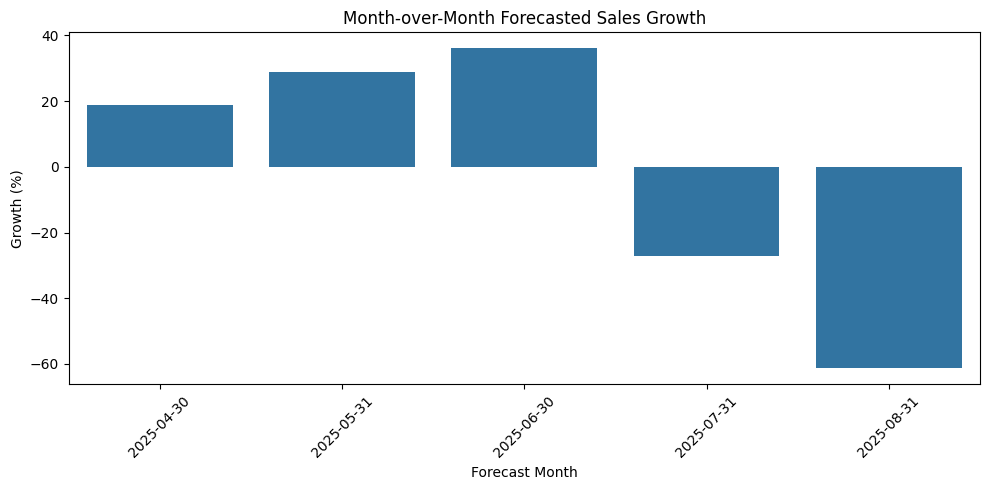

In [26]:
# Plot percentage change month-over-month
plt.figure(figsize=(10, 5))
sns.barplot(data=forecast_summary[1:], x='ds', y='% Change')
plt.title("Month-over-Month Forecasted Sales Growth")
plt.ylabel("Growth (%)")
plt.xlabel("Forecast Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

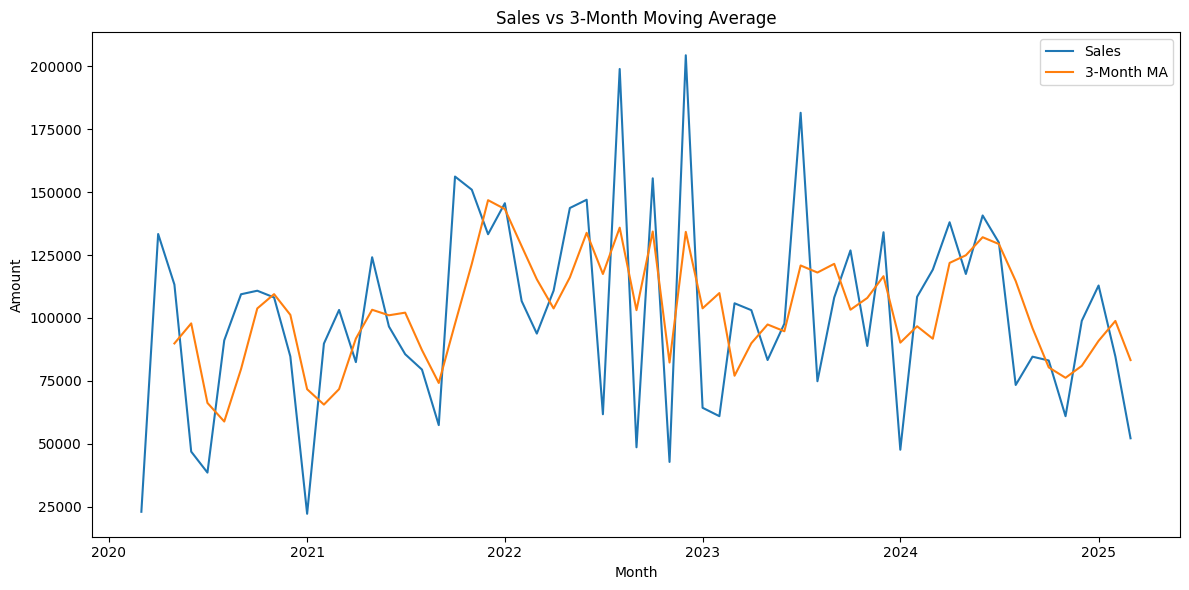

In [27]:
# Rolling Average
monthly_sales['3_Month_MA'] = monthly_sales['Amount'].rolling(window=3).mean()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Amount', label='Sales')
sns.lineplot(data=monthly_sales, x='Month', y='3_Month_MA', label='3-Month MA')
plt.title("Sales vs 3-Month Moving Average")
plt.tight_layout()
plt.show()